In [1]:
import pandas as pd

In [4]:
amazon_data = pd.read_csv('/content/1429_1.csv')
amazon_data.head()

<ipython-input-4-c2656f893948>:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_data = pd.read_csv('/content/1429_1.csv')


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [5]:
import pandas as pd

# Sample structure: amazon_data has 'name' (product name) and 'asins' (product codes)
grouped_products = amazon_data.groupby('name')['asins'].unique().reset_index()

# Display each product and its ASINs
for _, row in grouped_products.iterrows():
    print(f"Product: {row['name']}\nASINs: {', '.join(row['asins'])}\n{'-'*50}")

Product: All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta
ASINs: B01AHB9CN2
--------------------------------------------------
Product: All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta
ASINs: B002Y27P3M, B01AHB9CYG
--------------------------------------------------
Product: All-New Kindle E-reader - Black, 6 Glare-Free Touchscreen Display, Wi-Fi -  Includes Special Offers,,
ASINs: B01J2G4VBG
--------------------------------------------------
Product: Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
ASINs: B00L9EPT8O,B01E6AO69U
--------------------------------------------------
Product: Amazon - Fire 16GB (5th Gen, 2015 Release) - Black,,,
Amazon - Fire 16GB (5th Gen, 2015 Release) - Black,,,
ASINs: B00IOY8XWQ
--------------------------------------------------
Product: Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black,,,
Ama

TypeError: sequence item 4: expected str instance, float found

In [9]:
from transformers import pipeline

# Load pre-trained summarization model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Group by category and rating, then summarize
def summarize_reviews(reviews):
    text = " ".join(reviews[:10])  # Limit to first 10 reviews to avoid exceeding model limits
    summary = summarizer(text, max_length=150, min_length=50, do_sample=False)
    return summary[0]['summary_text']

# Apply summarization per category and rating
summary_data = amazon_data.groupby(['categories', 'reviews.rating'])['reviews.text'].apply(summarize_reviews).reset_index()
summary_data.columns = ['Categories', 'Rating', 'Summary']


Device set to use cpu
Your max_length is set to 150, but your input_length is only 92. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Your max_length is set to 150, but your input_length is only 134. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=67)
Your max_length is set to 150, but your input_length is only 79. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=39)
Your max_length is set to 150, but your input_length is only 98. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('..

KeyboardInterrupt: 

In [11]:
import pandas as pd

# Step 1: Count the number of reviews per category and get the top 10 categories
top_categories = amazon_data['categories'].value_counts().nlargest(10).index

# Step 2: Filter the dataset to include only the top 10 categories
filtered_data = amazon_data[amazon_data['categories'].isin(top_categories)]

# Step 3: Apply summarization per category and rating
summary_data = filtered_data.groupby(['categories', 'reviews.rating'])['reviews.text'].apply(summarize_reviews).reset_index()

summary_data.columns = ['Category', 'Rating', 'Summary']

# Step 4: Display or save the results
print(summary_data)


Your max_length is set to 150, but your input_length is only 92. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)


IndexError: index out of range in self

In [12]:
print(amazon_data.columns)

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')


In [14]:
import pandas as pd
from collections import Counter
from transformers import pipeline

# Load your dataset
# amazon_data = pd.read_csv("your_file.csv")  # Uncomment this if loading from a file

# Step 1: Get the Top 10 Most Frequent Categories
all_categories = amazon_data['categories'].dropna().str.split(',').explode()
top_10_categories = [cat for cat, _ in Counter(all_categories).most_common(10)]

# Step 2: Filter Dataset for Only These Categories
filtered_data = amazon_data[amazon_data['categories'].apply(lambda x: any(cat in x for cat in top_10_categories))]

# Step 3: Load a Summarization Model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Function to summarize reviews with missing values handled
def summarize_reviews(texts):
    texts = texts.dropna().astype(str)  # Remove NaNs and convert everything to string
    combined_text = " ".join(texts)

    if len(combined_text.split()) < 50:
        return combined_text  # Don't summarize if too short

    return summarizer(combined_text, max_length=min(100, len(combined_text.split()) // 2), min_length=30, do_sample=False)[0]['summary_text']

# Step 4: Apply summarization per category and rating
summary_data = filtered_data.groupby(['categories', 'reviews.rating'])['reviews.text'].apply(summarize_reviews).reset_index()

# Step 5: Visualize
import plotly.express as px

fig = px.bar(summary_data, x='categories', y='reviews.rating', text='reviews.text', title="Summarized Reviews by Category & Rating")
fig.show()


Device set to use cpu


IndexError: index out of range in self

In [15]:
# Convert all reviews to string and fill NaNs with an empty string
filtered_data['reviews.text'] = filtered_data['reviews.text'].astype(str).fillna('')


<ipython-input-15-089c99c22f04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['reviews.text'] = filtered_data['reviews.text'].astype(str).fillna('')


In [16]:
summary_data = filtered_data.groupby(['categories', 'reviews.rating'])['reviews.text'].apply(summarize_reviews).reset_index()


IndexError: index out of range in self

In [17]:
def summarize_reviews(texts):
    combined_text = " ".join(texts)
    if len(combined_text.split()) < 30:
        return combined_text  # Skip summarization for very short text

    print(f"Summarizing text (length: {len(combined_text.split())} words)...")

    try:
        return summarizer(combined_text,
                          max_length=min(100, len(combined_text.split()) // 2),
                          min_length=30,
                          do_sample=False)[0]['summary_text']
    except IndexError as e:
        print(f"Error: {e}, Skipping summarization for this group.")
        return combined_text  # Return original if summarization fails


In [18]:
for name, group in filtered_data.groupby(['categories', 'reviews.rating']):
    text = " ".join(group['reviews.text'])
    if len(text.split()) < 30:
        print(f"Skipping category {name} due to insufficient text.")


Skipping category ("Electronics,Computers,Computer Accessories,Cases & Bags,Fire Tablets,Electronics Features,Tablets,Computers & Tablets,Kids' Tablets,Electronics, Tech Toys, Movies, Music,iPad & Tablets,Top Rated", 4.0) due to insufficient text.
Skipping category ('Electronics,iPad & Tablets,All Tablets,Computers & Tablets,Tablets,eBook Readers', 3.0) due to insufficient text.
Skipping category ('Fire Tablets,Tablets,Computers & Tablets,All Tablets,Frys', 5.0) due to insufficient text.
Skipping category ('eBook Readers,Kindle E-readers,Computers & Tablets,E-Readers & Accessories,E-Readers', 2.0) due to insufficient text.


In [21]:
if len('reviews.text'.split()) > 500:  # Adjust for your model
    combined_text = " ".join('reviews.text'.split()[:500])


In [22]:
sample = filtered_data.sample(5)  # Take a small random sample
sample.groupby(['categories', 'reviews.rating'])['reviews.text'].apply(summarize_reviews)


Your min_length=30 must be inferior than your max_length=21.


Summarizing text (length: 43 words)...


/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1427: UserWarning: Unfeasible length constraints: `min_length` (30) is larger than the maximum possible length (21). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(
Your min_length=30 must be inferior than your max_length=28.


Summarizing text (length: 57 words)...


/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1427: UserWarning: Unfeasible length constraints: `min_length` (30) is larger than the maximum possible length (28). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(
Your min_length=30 must be inferior than your max_length=28.


Summarizing text (length: 57 words)...


categories                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             reviews.rating
Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        5.0               The screen size is good and the HD pictures ar...
Stereos,Remote Controls,Amazon Echo,Audio Docks & Mini Speakers,Amazon Echo Accessories,Kitchen & Dining Features,Speaker Systems,Electronics,TVs Entertainment,Clearance,Smart Hubs & Wireless Routers,Featured Brands,Wireless Speakers,Smart Home & Connected Living,Home Security,Kindle Store,Home Automation,Home, Garage & Office,Home,Voice-Enabled Smart Assistants,Virtual Assistant Speakers,Portable Audio & Headphones,Electronics Features,Amazon Device Accessories,iPod, Audio Player Accessories,Home & Furniture Clearance,Consumer Electronics,Smart Home,Surveillance,Home Improvement,Smart Home & Home Automation Devices,Smart Hubs,Home Safety & Security,Voice Assistants,Alarms & Sensors,Amazon Devices,Audio,Holiday Shop  4.0               What a fun piece of equipment. I constantly fi...
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       5.0               Just tell alexia what to play--and the party i...
Walmart for Business,Office Electronics,Tablets,Office,Electronics,iPad & Tablets,Windows Tablets,All Windows Tablets,Computers & Tablets,E-Readers & Accessories,E-Readers,eBook Readers,Kindle E-readers,Computers/Tablets & Networking,Tablets & eBook Readers,Electronics Features,Books & Magazines,Book Accessories,eReaders,TVs & Electronics,Computers & Laptops,Tablets & eReaders                                                                                                                                                                                                                                                                                                                                                            5.0               With the advent of technology, picking up and ...
Name: reviews.text, dtype: object

In [23]:
summary_data = filtered_data.groupby(['categories', 'reviews.rating'])['reviews.text'].apply(summarize_reviews).reset_index()
summary_data.rename(columns={'reviews.text': 'summary'}, inplace=True)


Summarizing text (length: 226 words)...
Summarizing text (length: 407 words)...
Summarizing text (length: 328 words)...
Summarizing text (length: 329 words)...
Summarizing text (length: 487 words)...
Summarizing text (length: 229 words)...
Summarizing text (length: 457 words)...
Summarizing text (length: 735 words)...
Summarizing text (length: 3174 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 2084 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 2187 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 5481 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 30196 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 103581 words)...
Error: index out of range in self, Skipping summarization for

Your min_length=30 must be inferior than your max_length=24.


Summarizing text (length: 1562 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 49 words)...


/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1427: UserWarning: Unfeasible length constraints: `min_length` (30) is larger than the maximum possible length (24). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


Summarizing text (length: 108 words)...
Summarizing text (length: 406 words)...
Summarizing text (length: 69 words)...
Summarizing text (length: 189 words)...
Summarizing text (length: 70 words)...
Summarizing text (length: 760 words)...
Summarizing text (length: 843 words)...
Summarizing text (length: 1383 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 8507 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 16278 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 357 words)...
Summarizing text (length: 335 words)...
Summarizing text (length: 733 words)...
Summarizing text (length: 3141 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 5246 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 

Your min_length=30 must be inferior than your max_length=23.


Summarizing text (length: 46 words)...


/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1427: UserWarning: Unfeasible length constraints: `min_length` (30) is larger than the maximum possible length (23). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


Summarizing text (length: 117 words)...
Summarizing text (length: 380 words)...
Summarizing text (length: 161 words)...
Summarizing text (length: 1209 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 706 words)...


Your min_length=30 must be inferior than your max_length=15.


Summarizing text (length: 30 words)...


/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1427: UserWarning: Unfeasible length constraints: `min_length` (30) is larger than the maximum possible length (15). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(
Your min_length=30 must be inferior than your max_length=21.


Summarizing text (length: 42 words)...


/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1427: UserWarning: Unfeasible length constraints: `min_length` (30) is larger than the maximum possible length (21). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


Summarizing text (length: 439 words)...
Summarizing text (length: 1874 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 4050 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 1475 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 1322 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 3929 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 24390 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 49863 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 375 words)...
Summarizing text (length: 469 words)...
Summarizing text (length: 1039 words)...
Error: index out of range in sel

Your min_length=30 must be inferior than your max_length=23.


Summarizing text (length: 46 words)...
Summarizing text (length: 83 words)...
Summarizing text (length: 119 words)...
Summarizing text (length: 581 words)...
Summarizing text (length: 170 words)...
Summarizing text (length: 295 words)...
Summarizing text (length: 2243 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 2356 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 10017 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 52335 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 148575 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 122 words)...
Summarizing text (length: 139 words)...
Summarizing text (length: 167 words)...
Summarizing text (length: 976 words)...
Error: index out of ran

Your min_length=30 must be inferior than your max_length=26.


Summarizing text (length: 81820 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 52 words)...


/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1427: UserWarning: Unfeasible length constraints: `min_length` (30) is larger than the maximum possible length (26). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


Summarizing text (length: 218 words)...
Summarizing text (length: 1262 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 4336 words)...
Error: index out of range in self, Skipping summarization for this group.
Summarizing text (length: 222 words)...
Summarizing text (length: 3419 words)...
Error: index out of range in self, Skipping summarization for this group.


In [24]:
summary_data.to_csv("summarized_reviews.csv", index=False)


In [28]:
top_categories = summary_data['categories'].value_counts().head(10).index
filtered_top_categories = summary_data[summary_data['categories'].isin(top_categories)]

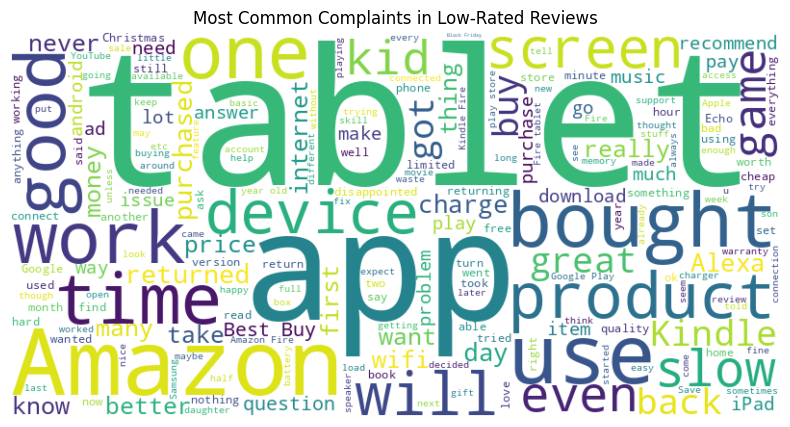

In [29]:
low_rated_reviews = filtered_top_categories[filtered_top_categories['reviews.rating'].isin([1, 2])]

# Concatenate all low-rated reviews into a single string
low_rating_text = " ".join(low_rated_reviews['summary'])

# Generate a word cloud for the complaints
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(low_rating_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Complaints in Low-Rated Reviews")
plt.show()


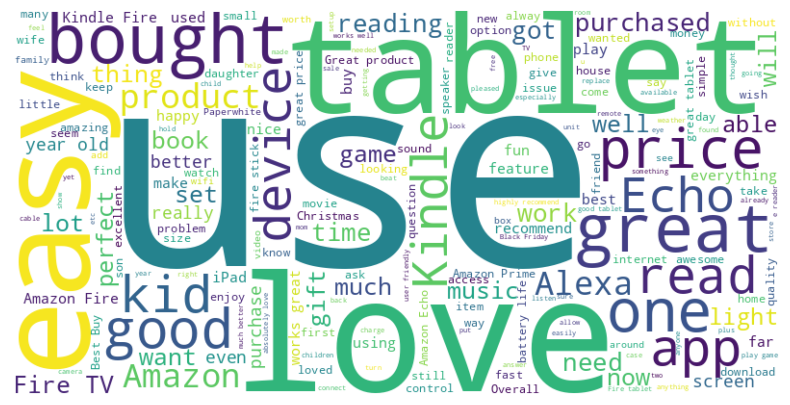

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(summary_data['summary'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


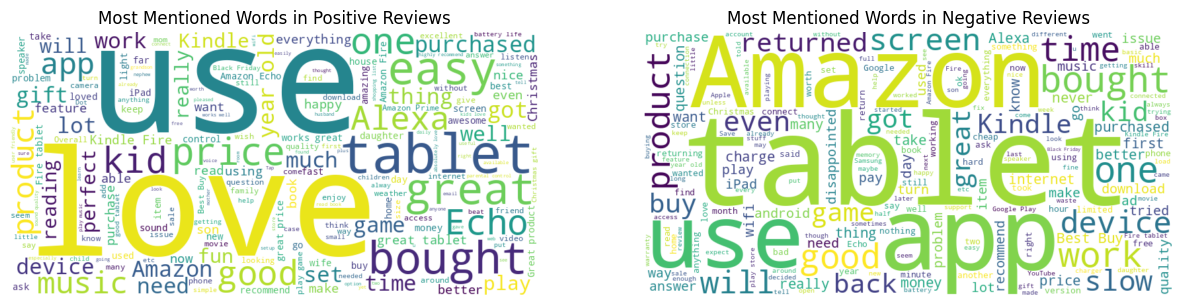

In [30]:
positive_reviews = filtered_top_categories[filtered_top_categories['reviews.rating'].isin([4, 5])]
negative_reviews = filtered_top_categories[filtered_top_categories['reviews.rating'].isin([1, 2])]

# Concatenate the reviews into two strings: one for positive and one for negative
positive_text = " ".join(positive_reviews['summary'])
negative_text = " ".join(negative_reviews['summary'])

# Generate word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the word clouds
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(positive_wordcloud, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title("Most Mentioned Words in Positive Reviews")

axes[1].imshow(negative_wordcloud, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title("Most Mentioned Words in Negative Reviews")

plt.show()


In [32]:
#!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [43]:
import dash
from dash import dcc, html
import plotly.express as px

# Initialize the Dash app
app = dash.Dash(__name__)

# Get the top 3 categories based on frequency
top_categories = filtered_top_categories['categories'].value_counts().head(2).index

# Define the layout
app.layout = html.Div([
    html.H1("Review Summaries per Category", style={'textAlign': 'center', 'marginBottom': '30px'}),

    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': category, 'value': category} for category in top_categories],
        value=top_categories[0],  # Default category
        style={
            'width': '60%',
            'margin': '0 auto',
            'padding': '10px',
            'display': 'block',
            'textAlign': 'center',
            'maxHeight': '600px',  # Set a max height for the dropdown
            'overflowY': 'scroll'   # Enable scrolling for the options
        },
        multi=False,
        clearable=False
    ),

    html.Div(id='category-summary', style={'marginTop': '30px'})
])

# Callback to update summary based on selected category
@app.callback(
    dash.dependencies.Output('category-summary', 'children'),
    [dash.dependencies.Input('category-dropdown', 'value')]
)
def update_summary(selected_category):
    category_data = filtered_top_categories[filtered_top_categories['categories'] == selected_category]
    summary = category_data['summary'].head(5).tolist()  # Show top 5 summaries
    return html.Div([html.P(f"Summary {i+1}: {s}", style={'fontSize': '16px', 'marginBottom': '10px'}) for i, s in enumerate(summary)])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [47]:
import plotly.express as px
import pandas as pd

# Filter for bad reviews (ratings 1 and 2)
bad_reviews = filtered_data[filtered_data['reviews.rating'].isin([1, 2])]

# Count bad reviews by category
bad_reviews_counts = bad_reviews.groupby('categories').size().reset_index(name='bad_reviews_count')

# Sort by bad reviews count and get top 10 categories
top_bad_reviews = bad_reviews_counts.sort_values('bad_reviews_count', ascending=False).head(10)

# Plot the top 10 categories with most bad reviews
fig1 = px.bar(top_bad_reviews, x='categories', y='bad_reviews_count',
              title='Top 10 Categories with Most Bad Reviews (Ratings 1 and 2)',
              labels={'bad_reviews_count': 'Number of Bad Reviews', 'categories': 'Categories'},
              color='bad_reviews_count', color_continuous_scale='Viridis')

# Show the figure
fig1.update_layout(xaxis_tickangle=-45)
fig1.show()


# Filter for good reviews (ratings 4 and 5)
good_reviews = filtered_data[filtered_data['reviews.rating'].isin([4, 5])]

# Count good reviews by category
good_reviews_counts = good_reviews.groupby('categories').size().reset_index(name='good_reviews_count')

# Sort by good reviews count and get top 10 categories
top_good_reviews = good_reviews_counts.sort_values('good_reviews_count', ascending=False).head(10)

# Plot the top 10 categories with most good reviews
fig2 = px.bar(top_good_reviews, x='categories', y='good_reviews_count',
              title='Top 10 Categories with Most Good Reviews (Ratings 4 and 5)',
              labels={'good_reviews_count': 'Number of Good Reviews', 'categories': 'Categories'},
              color='good_reviews_count', color_continuous_scale='Blues')

# Show the figure
fig2.update_layout(xaxis_tickangle=-45)
fig2.show()
